# Quandl Natural Gas Data Experiments and Visualization

So recently I discovered this great API called Quandl which enables a user to access Financial and Economic data for free. Therefore, I decided to do a little exploratory data analysis on some of the datasets that were available and I'm also going to see if I can try my hand at explaining some of the market pricing that is going on. Let's see what happens.

In [2]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [3]:
ng_commit = quandl.get("CFTC/NG_F_ALL") #Natural Gas Commit
ng_concentration = quandl.get("CFTC/NG_FO_ALL_CR") #Natural Gas Concentration
ng_spot = quandl.get("COM/WLD_NGAS_US") #Natural Gas Spot Prices from spot price at Henry Hub, Louisiana Natural Gas $/mmbtu
ng_emini = quandl.get("CHRIS/CME_QG2") #E-Mini Natural Gas Futures from the CME

In [4]:
ng_commit.head() #weekly from 2006
ng_concentration.head() #weekly from 2006
ng_spot.head() #monthly from 1960
ng_emini.head() #daily from 2014

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2014-02-18,4.620,4.800,4.620,4.753,0.176,4.753,233.0,940.0
2014-02-19,4.770,4.980,4.755,4.950,0.197,4.950,620.0,981.0
2014-02-20,4.945,4.970,4.800,4.856,0.094,4.856,386.0,975.0
2014-02-21,4.845,5.040,4.815,5.012,0.156,5.012,648.0,985.0
2014-02-24,5.090,5.205,4.590,4.620,0.392,4.620,2059.0,1080.0


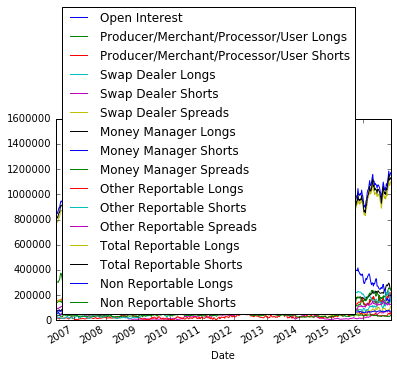

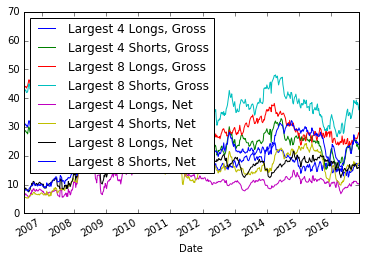

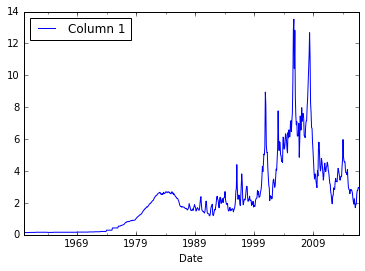

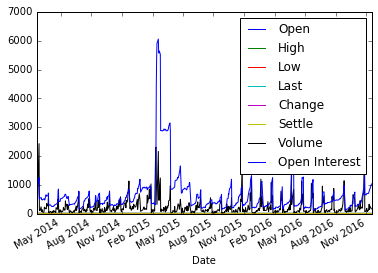

In [5]:
ng_commit.plot()
ng_concentration.plot()
ng_spot.plot()
ng_emini.plot()

It looks like I'm going to need to split up the first two graphs but it's very apparent that there were some very big events in the data that caused tremendous outliers. We're going to explore them right after we plot the first two tables.

In [8]:
ng_emini[['Volume','Change']].corr('spearman')

,Volume,Change
Volume,1.000000,0.280199
Change,0.280199,1.000000


In [9]:
ng_emini[['Volume','Open Interest','Change']].corr()

,Volume,Open Interest,Change
Volume,1.000000,0.412175,0.253578
Open Interest,0.412175,1.000000,0.072811
Change,0.253578,0.072811,1.000000


I was just a little curious to see if a couple of the variables were correlated in the E-mini for natural gas. Looks like there isn't too much going on in terms of correlation. But we'll take a further look at the relationships later.

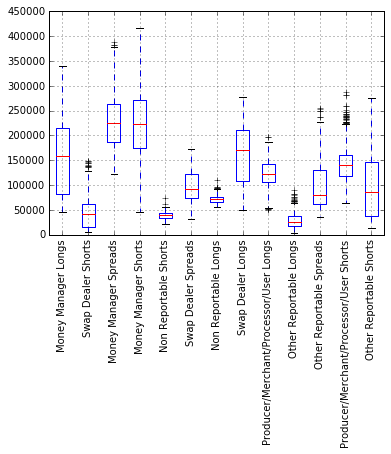

In [10]:
shorter = list(set(ng_commit.columns.values) - set([ng_commit.columns.values[0],ng_commit.columns.values[-3],ng_commit.columns.values[-4]]))
ng_commit[shorter].boxplot(rot=90,return_type='axes')

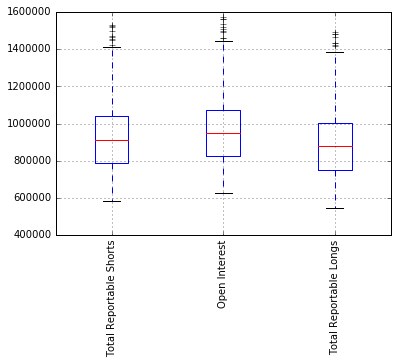

In [11]:
larger = list(set(ng_commit.columns.values)-set(shorter))
ng_commit[larger].boxplot(rot=90,return_type='axes')

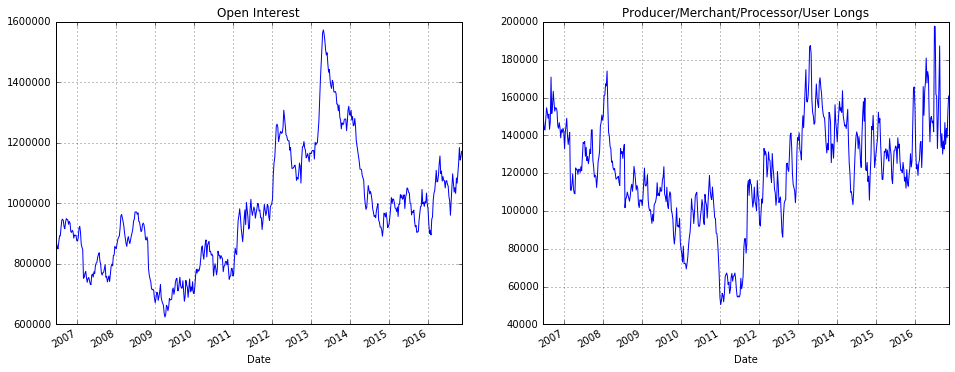

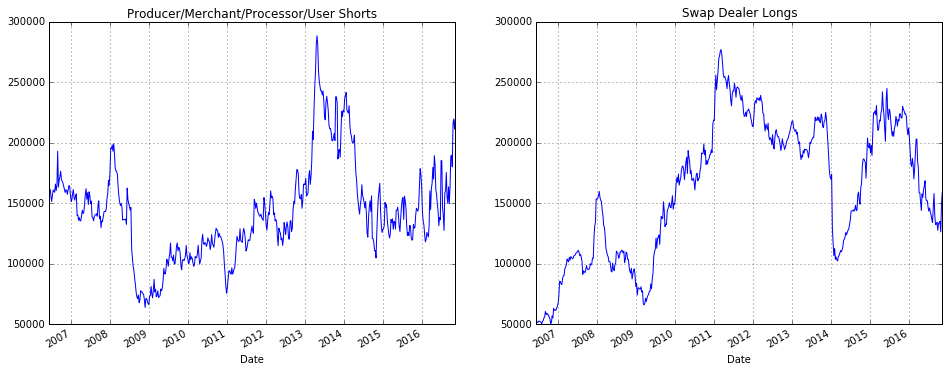

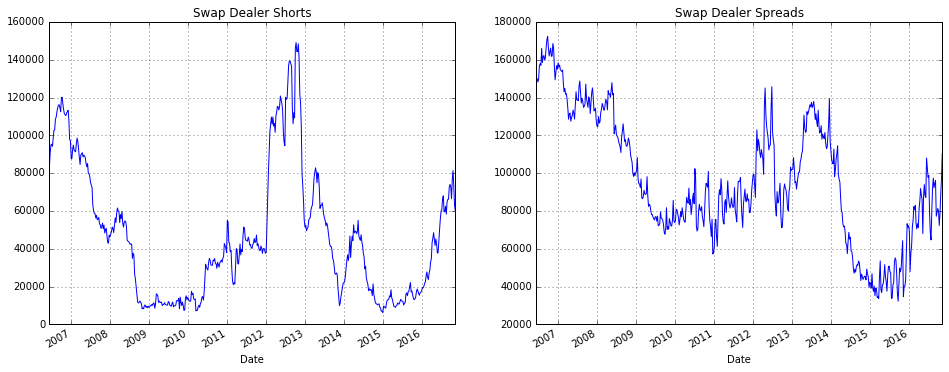

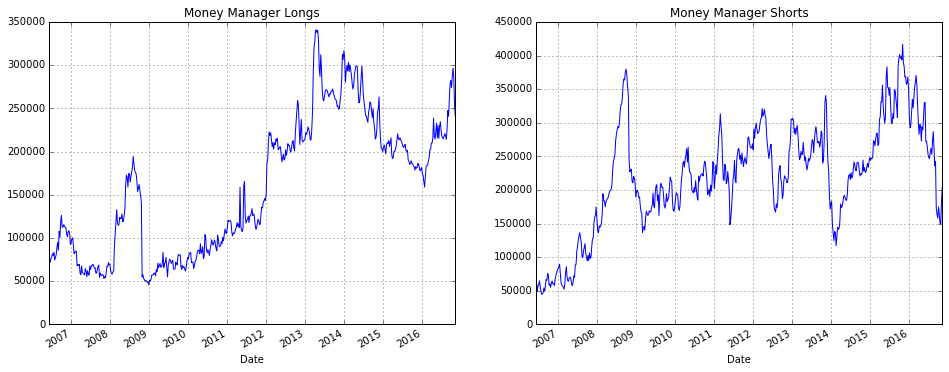

In [34]:
for i in range(len(ng_commit.columns.values)/2):
    if i%2 ==0:
        fig,axs = plt.subplots(1,2)
    ng_commit[ng_commit.columns.values[i]].plot(title=ng_commit.columns.values[i],ax=axs[i%2],figsize=(16,6),grid=True)

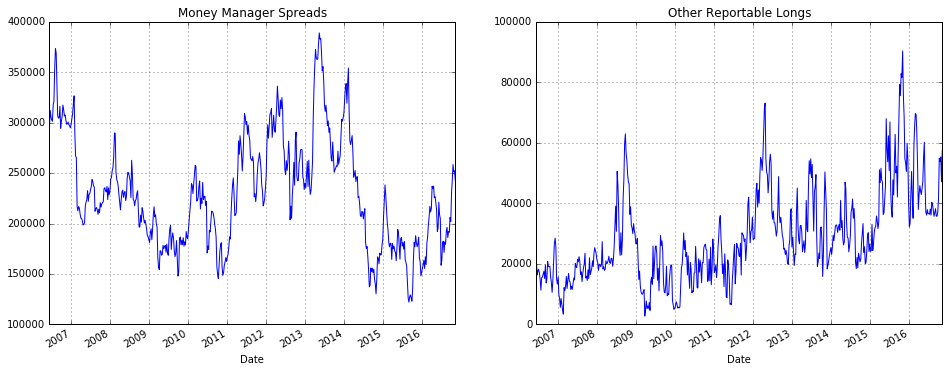

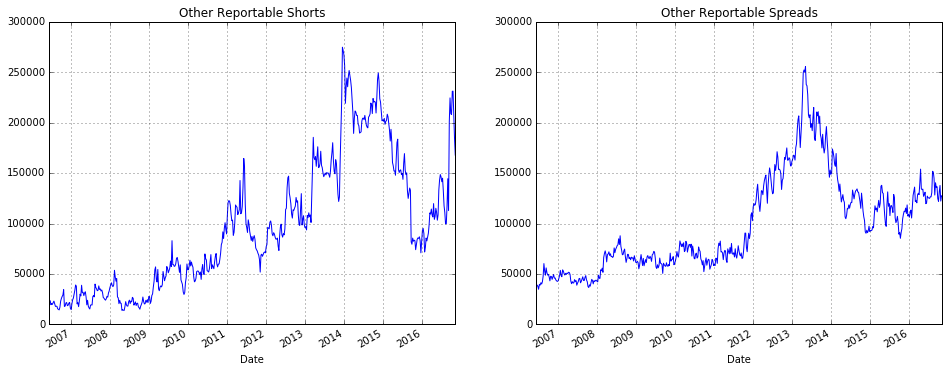

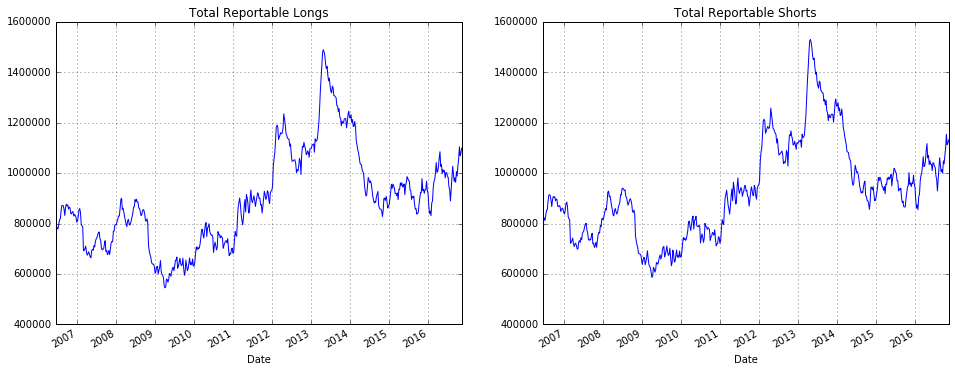

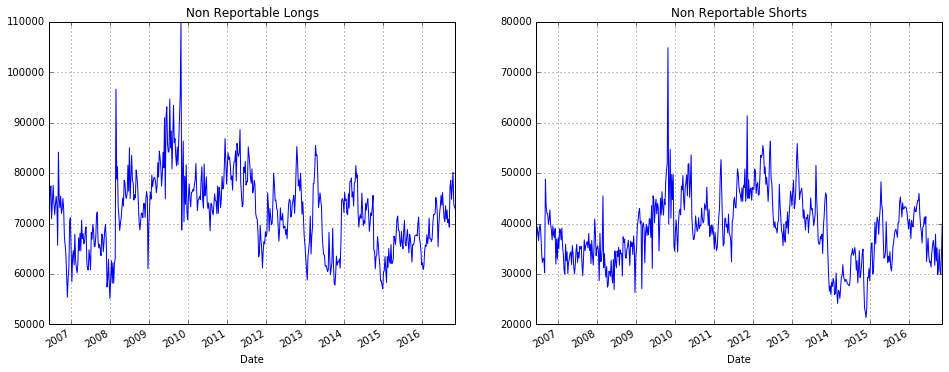

In [35]:
for i in range(len(ng_commit.columns.values)/2,len(ng_commit.columns.values)):
    if i%2 ==0:
        fig,axs = plt.subplots(1,2)
    ng_commit[ng_commit.columns.values[i]].plot(title=ng_commit.columns.values[i],ax=axs[i%2],figsize=(16,6),grid=True)

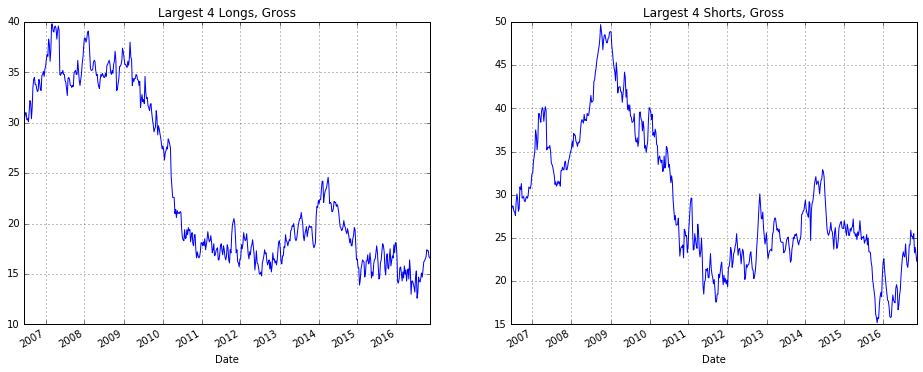

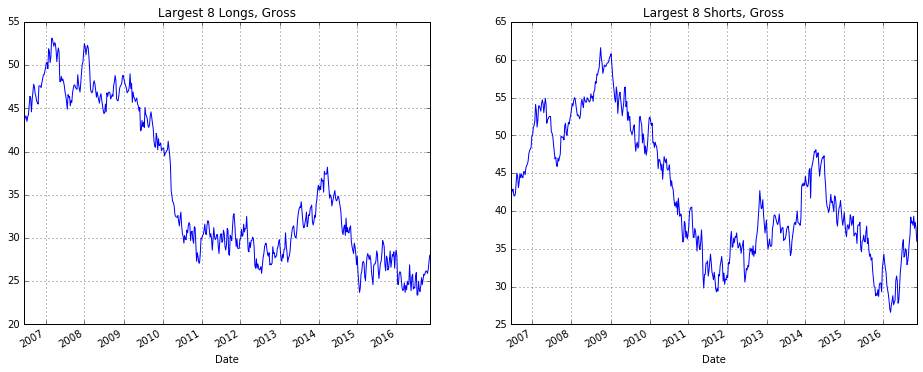

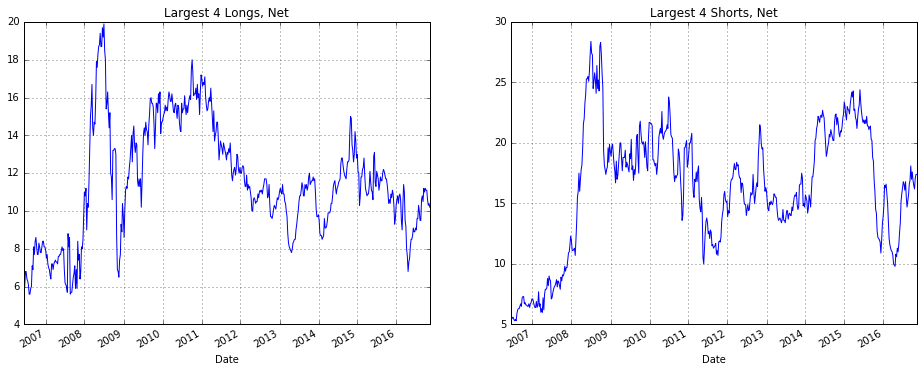

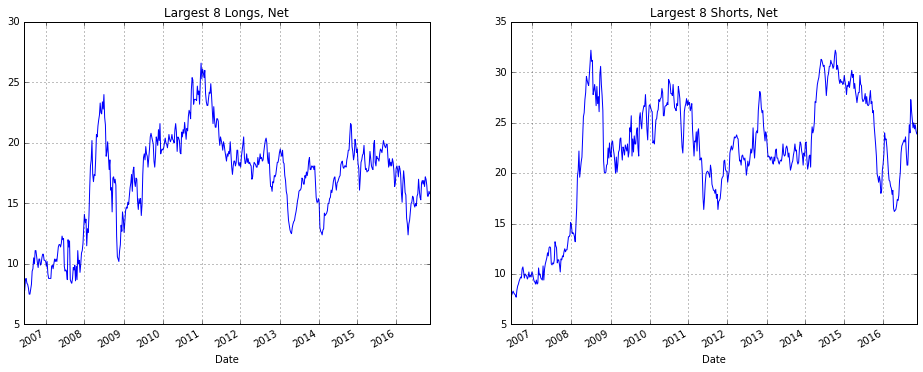

In [36]:
for i in range(len(ng_concentration.columns.values)):
    if i%2 ==0:
        fig,axs = plt.subplots(1,2)
    ng_concentration[ng_concentration.columns.values[i]].plot(title=ng_concentration.columns.values[i],ax=axs[i%2],figsize=(16,6),grid=True)

### Notes/Things to Explore:
* Open Interest and Producer/Merchant/Processor/User Short spiked early 2013
* Non-reportable Longs and Shorts spiked right before 2010
* Total Longs and Shorts at all time highs in early 2013
* Major spike in Open Interest and Volume in E-mini around February 2015
* 3 instances before 2008 where the spot price spiked dramatically.

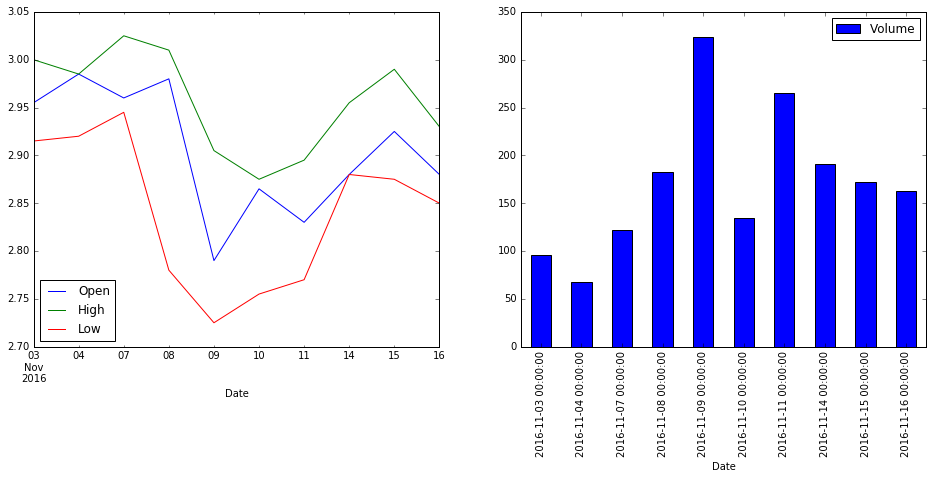

In [40]:
fig,axs = plt.subplots(1,2)
ng_emini[['Open','High','Low']].tail(10).plot(ax=axs[0],figsize=(16,6))
ng_emini.tail(10).plot(y='Volume',kind='bar',ax=axs[1],figsize=(16,6))

Given that Donald Trump won the elect and made big promises to spend on infrastucture, I thought maybe there would be a price movement upwards due to the use of natural gas to create goods such as steel. I guess I was wrong or perhaps competing fuels are priced cheaper and so natural gas is not really used. Regardless, I'm still interested in finding out why this drop occurred.